Este projeto tem por objetivo tentar provar a hipotese: "Países membros da OTAN possuem maior comercio de material bélico em relação a países externos ao bloco"

==========GUIA===========

Para o meu projeo 1 de Ciência dos dados, a organização escolhida foi a OTAN. A hipotese gerada foi: “Países membros da OTAN ou que adentraram o bloco posteriormente possuem maior exportação e importação de produtos bélicos”.
Para tentar comprovar essa hipotese a seguinte abordagem será seguida:

1.	Selecionar países que estão no bloco desde sua findação ou que entraram ja há um tempo razoavel no bloco, para que seus dados sejam confiaveis.

2.	Selecionar Países que entraram posteriormente no bloco, de forma que se possa ver com base nos dados obtidos no gapminder se há ou não mudanças em seus dados a partir de seu ano de entrada.

3.	Comparar os dados de importação e exportação de produtos belicos dos paises de dentro e de fora do bloco, e ressaltar as diferenças nos dados dos paises que entrarm postteriormente, de forma a mostrar possiveis aumentos ou decressimos em sesus indices a partir do ano de entrada na OTAN.

4.	Para comparar os paises serão geras tabelas comparativas, com dados lado a lado de acordo com os anos, a fim de encontrar diferenças e acabar por provar a hipotese.

5.	Fazer co-relações com entre o tempo do país no bloco e o aumento em suas comercializações bélicas.


In [18]:

%matplotlib inline

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Comecei importando os arquivos xlsx, no caso eu criei primeiramente um xlsx maior, com todos os dados, e o chamei de dados, porém por quesões de organização decidi dividi-lo em arquivos menores, nas categorias selecionadas e descritas pelo seu nome, da seguinte forma:

In [19]:
#aqui eu atribuo a variavel dados o escel contendo meu dataset
dados=pd.read_excel("dados_exp_imp.xlsx")
#a seguir apenas plotei as tabelas para checar se o codigo tinha funcionado para cada arquivo xlsx
dados.head()

,Ano,A1960,A1961,A1962,A1963,A1964,A1965,A1966,A1967,A1968,...,A2003,A2004,A2005,A2006,A2007,A2008,A2009,A2010,Situação,Dado
0,Estados Unidos,6.096000e+09,6.679000e+09,5.742000e+09,9.364000e+09,1.257000e+10,1.146700e+10,8.528000e+09,7.435000e+09,8.385000e+09,...,5.698000e+09,6866000000,6.700000e+09,7453000000,8.003000e+09,6.288000e+09,6.658000e+09,8.641000e+09,0,0
1,Estados Unidos,2.190000e+08,2.430000e+08,3.140000e+08,4.330000e+08,4.410000e+08,3.050000e+08,1.940000e+08,1.220000e+08,1.200000e+08,...,5.930000e+08,551000000,5.200000e+08,551000000,7.520000e+08,8.710000e+08,9.290000e+08,8.930000e+08,0,1
2,França,1.171000e+09,1.084000e+09,1.523000e+09,1.695000e+09,1.896000e+09,1.699000e+09,1.731000e+09,1.596000e+09,1.873000e+09,...,1.345000e+09,2219000000,1.724000e+09,1643000000,2.432000e+09,1.994000e+09,1.865000e+09,8.340000e+08,0,0
3,França,2.610000e+08,2.270000e+08,2.080000e+08,1.160000e+08,1.226000e+09,2.450000e+08,1.040000e+08,1.210000e+08,1.410000e+08,...,5.700000e+07,93000000,NaN,60000000,6.900000e+07,8.000000e+06,7.800000e+07,1.200000e+08,0,1
4,Italia,9.900000e+07,2.490000e+08,2.670000e+08,2.350000e+08,3.660000e+08,2.750000e+08,2.220000e+08,1.260000e+08,1.620000e+08,...,3.410000e+08,212000000,7.740000e+08,502000000,6.840000e+08,4.170000e+08,5.140000e+08,6.270000e+08,0,0


Agora que sei que todos os arquivos foram importados corretamente, começarei separando-os em categorias segundo a sua entrada na OTAN. Há uma coluna na tabela chamada: "Situação", ela trata da entrada do país na OTAN, ou seja, é uma variavel qualitativa, sendo 0 países ja presentes na organização desde sua fundação, 1 países de fora da organização e 2 países que entraram posteriormente na organização. Também há uma coluna denominada Dado que representa se a informação da linha é sobre a exportação 0, ou importação 1.

In [20]:
print("Situação")
situacao=dados.Situação
situacao


Situação


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    1
13    1
14    1
15    1
16    0
17    0
18    1
19    1
20    2
21    2
22    2
23    2
24    2
25    2
Name: Situação, dtype: int64

In [21]:
print("Importação ou Exportação ")
exp_imp=dados.Dado
exp_imp

Importação ou Exportação 


0     0
1     1
2     0
3     1
4     0
5     1
6     0
7     1
8     0
9     1
10    0
11    1
12    0
13    1
14    0
15    1
16    0
17    1
18    0
19    1
20    0
21    1
22    0
23    1
24    0
25    1
Name: Dado, dtype: int64

agora podemos saber claramente a linha de cada país, e se os dados são de exportação ou importação, além disso podemos saber se o país esta desde o início na OTAN, se não faz parte, e até mesmo se entrou tardiamente na organização.

In [22]:
#separando os dados de exportação na tabela
#expor=dados.loc[[0,2,4,6,8,10,12,14,16,18,20,22,24,26]]
expor=dados.loc[(dados["Dado"]==0),:]
expor

,Ano,A1960,A1961,A1962,A1963,A1964,A1965,A1966,A1967,A1968,...,A2003,A2004,A2005,A2006,A2007,A2008,A2009,A2010,Situação,Dado
0,Estados Unidos,6.096000e+09,6.679000e+09,5.742000e+09,9.364000e+09,1.257000e+10,1.146700e+10,8.528000e+09,7.435000e+09,8.385000e+09,...,5.698000e+09,6866000000,6.700000e+09,7453000000,8.003000e+09,6.288000e+09,6.658000e+09,8.641000e+09,0,0
2,França,1.171000e+09,1.084000e+09,1.523000e+09,1.695000e+09,1.896000e+09,1.699000e+09,1.731000e+09,1.596000e+09,1.873000e+09,...,1.345000e+09,2219000000,1.724000e+09,1643000000,2.432000e+09,1.994000e+09,1.865000e+09,8.340000e+08,0,0
4,Italia,9.900000e+07,2.490000e+08,2.670000e+08,2.350000e+08,3.660000e+08,2.750000e+08,2.220000e+08,1.260000e+08,1.620000e+08,...,3.410000e+08,212000000,7.740000e+08,502000000,6.840000e+08,4.170000e+08,5.140000e+08,6.270000e+08,0,0
6,Bélgica,3.000000e+06,0.000000e+00,3.000000e+06,1.000000e+06,1.000000e+06,NaN,1.200000e+07,NaN,NaN,...,1.500000e+07,47000000,1.610000e+08,58000000,1.800000e+07,2.280000e+08,2.420000e+08,7.000000e+06,0,0
8,Canadá,5.300000e+07,3.090000e+08,1.880000e+08,2.130000e+08,2.520000e+08,1.110000e+08,9.000000e+07,4.400000e+07,1.000000e+08,...,2.630000e+08,265000000,2.260000e+08,226000000,3.340000e+08,2.270000e+08,1.690000e+08,2.580000e+08,0,0
10,Reino Unido,1.942000e+09,1.083000e+09,1.167000e+09,9.860000e+08,1.270000e+09,1.425000e+09,1.357000e+09,2.225000e+09,1.582000e+09,...,7.410000e+08,1316000000,1.039000e+09,855000000,1.018000e+09,9.820000e+08,1.022000e+09,1.054000e+09,0,0
12,Brasil,2.000000e+06,1.200000e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,44000000,1.000000e+06,44000000,4.700000e+07,9.200000e+07,3.600000e+07,1.790000e+08,1,0
14,China,3.050000e+08,3.700000e+07,5.400000e+07,1.100000e+07,6.100000e+07,4.500000e+08,6.750000e+08,4.390000e+08,7.250000e+08,...,6.650000e+08,292000000,3.030000e+08,597000000,4.300000e+08,5.860000e+08,1.000000e+09,1.423000e+09,1,0
16,Holanda,6.000000e+06,9.300000e+07,8.400000e+07,6.600000e+07,7.200000e+07,1.040000e+08,7.900000e+07,9.200000e+07,3.490000e+08,...,3.420000e+08,209000000,5.830000e+08,1187000000,1.326000e+09,5.300000e+08,5.450000e+08,5.030000e+08,0,0
18,Suiça,4.320000e+08,5.000000e+08,5.280000e+08,3.280000e+08,3.700000e+08,4.820000e+08,3.590000e+08,2.530000e+08,8.700000e+07,...,1.810000e+08,243000000,2.460000e+08,285000000,3.010000e+08,4.820000e+08,2.550000e+08,1.370000e+08,1,0


In [23]:
#separando os dados de importação na tabela
impor=dados.loc[(dados["Dado"]==1),:]
impor

,Ano,A1960,A1961,A1962,A1963,A1964,A1965,A1966,A1967,A1968,...,A2003,A2004,A2005,A2006,A2007,A2008,A2009,A2010,Situação,Dado
1,Estados Unidos,2.190000e+08,2.430000e+08,3.140000e+08,4.330000e+08,4.410000e+08,305000000.0,194000000.0,1.220000e+08,1.200000e+08,...,5.930000e+08,551000000,5.200000e+08,551000000,7.520000e+08,8.710000e+08,9.290000e+08,893000000.0,0,1
3,França,2.610000e+08,2.270000e+08,2.080000e+08,1.160000e+08,1.226000e+09,245000000.0,104000000.0,1.210000e+08,1.410000e+08,...,5.700000e+07,93000000,NaN,60000000,6.900000e+07,8.000000e+06,7.800000e+07,120000000.0,0,1
5,Italia,5.050000e+08,5.410000e+08,8.420000e+08,1.257000e+09,1.285000e+09,918000000.0,405000000.0,9.200000e+07,1.460000e+08,...,5.700000e+08,446000000,1.500000e+08,423000000,5.150000e+08,1.730000e+08,7.900000e+07,85000000.0,0,1
7,Bélgica,1.410000e+08,8.800000e+07,6.200000e+07,7.060000e+08,7.500000e+08,558000000.0,92000000.0,3.100000e+07,2.120000e+08,...,2.700000e+07,18000000,0.000000e+00,21000000,1.700000e+08,2.000000e+08,9.000000e+07,30000000.0,0,1
9,Canadá,1.730000e+08,1.747000e+09,1.036000e+09,9.040000e+08,6.650000e+08,520000000.0,273000000.0,2.430000e+08,3.540000e+08,...,1.560000e+08,356000000,1.160000e+08,107000000,4.320000e+08,4.280000e+08,9.300000e+07,373000000.0,0,1
11,Reino Unido,2.600000e+07,3.200000e+07,3.800000e+07,1.490000e+08,1.300000e+08,163000000.0,213000000.0,1.413000e+09,2.798000e+09,...,7.690000e+08,243000000,2.700000e+07,337000000,7.290000e+08,5.470000e+08,3.860000e+08,518000000.0,0,1
13,Brasil,2.400000e+08,2.300000e+08,5.300000e+07,1.200000e+08,2.200000e+07,148000000.0,56000000.0,2.180000e+08,1.420000e+08,...,1.100000e+08,81000000,2.230000e+08,197000000,2.110000e+08,2.000000e+08,1.650000e+08,314000000.0,1,1
15,China,1.819000e+09,1.757000e+09,1.730000e+08,1.910000e+08,1.380000e+08,101000000.0,231000000.0,1.750000e+08,1.820000e+08,...,2.233000e+09,3141000000,3.536000e+09,2860000000,1.693000e+09,1.618000e+09,9.930000e+08,559000000.0,1,1
17,Holanda,2.970000e+08,4.130000e+08,3.770000e+08,7.290000e+08,7.920000e+08,751000000.0,230000000.0,1.072000e+09,3.130000e+08,...,1.720000e+08,153000000,9.600000e+07,78000000,2.510000e+08,1.450000e+08,2.170000e+08,162000000.0,0,1
19,Suiça,2.560000e+08,7.200000e+07,4.000000e+06,5.000000e+07,2.550000e+08,219000000.0,364000000.0,1.720000e+08,1.880000e+08,...,9.800000e+07,185000000,1.640000e+08,82000000,1.140000e+08,1.600000e+07,3.400000e+07,34000000.0,1,1


Agora que ja separamos a tabela de acordo com seu valor, importação ou exportação, vamos separa-las de acordo com os países, se estão desde o inicio na OTAN, se entraram tardiamente ou se não fazem parte

In [24]:
#paises dentro da OTAN
inside_import=dados.loc[(dados["Situação"]==0) & (dados["Dado"]==1),:]
inside_import=inside_import.iloc[0:3,0:52]
inside_import

,Ano,A1960,A1961,A1962,A1963,A1964,A1965,A1966,A1967,A1968,...,A2001,A2002,A2003,A2004,A2005,A2006,A2007,A2008,A2009,A2010
1,Estados Unidos,219000000.0,243000000.0,314000000.0,4.330000e+08,4.410000e+08,305000000.0,194000000.0,122000000.0,120000000.0,...,504000000.0,505000000.0,593000000.0,551000000,520000000.0,551000000,752000000.0,871000000.0,929000000.0,893000000.0
3,França,261000000.0,227000000.0,208000000.0,1.160000e+08,1.226000e+09,245000000.0,104000000.0,121000000.0,141000000.0,...,66000000.0,43000000.0,57000000.0,93000000,NaN,60000000,69000000.0,8000000.0,78000000.0,120000000.0
5,Italia,505000000.0,541000000.0,842000000.0,1.257000e+09,1.285000e+09,918000000.0,405000000.0,92000000.0,146000000.0,...,72000000.0,227000000.0,570000000.0,446000000,150000000.0,423000000,515000000.0,173000000.0,79000000.0,85000000.0


In [25]:
inside_export=dados.loc[(dados["Situação"]==0) & (dados["Dado"]==0),:]
inside_export=inside_export.iloc[0:3,0:52]
inside_export

,Ano,A1960,A1961,A1962,A1963,A1964,A1965,A1966,A1967,A1968,...,A2001,A2002,A2003,A2004,A2005,A2006,A2007,A2008,A2009,A2010
0,Estados Unidos,6.096000e+09,6.679000e+09,5.742000e+09,9.364000e+09,1.257000e+10,1.146700e+10,8.528000e+09,7.435000e+09,8.385000e+09,...,5.908000e+09,5.229000e+09,5.698000e+09,6866000000,6.700000e+09,7453000000,8.003000e+09,6.288000e+09,6.658000e+09,8.641000e+09
2,França,1.171000e+09,1.084000e+09,1.523000e+09,1.695000e+09,1.896000e+09,1.699000e+09,1.731000e+09,1.596000e+09,1.873000e+09,...,1.297000e+09,1.368000e+09,1.345000e+09,2219000000,1.724000e+09,1643000000,2.432000e+09,1.994000e+09,1.865000e+09,8.340000e+08
4,Italia,9.900000e+07,2.490000e+08,2.670000e+08,2.350000e+08,3.660000e+08,2.750000e+08,2.220000e+08,1.260000e+08,1.620000e+08,...,2.160000e+08,4.260000e+08,3.410000e+08,212000000,7.740000e+08,502000000,6.840000e+08,4.170000e+08,5.140000e+08,6.270000e+08


In [26]:
#paises fora da OTAN
outside_export=dados.loc[(dados["Situação"]==1) & (dados["Dado"]==0),:]
outside_export=outside_export.iloc[0:3,0:52]
outside_export

,Ano,A1960,A1961,A1962,A1963,A1964,A1965,A1966,A1967,A1968,...,A2001,A2002,A2003,A2004,A2005,A2006,A2007,A2008,A2009,A2010
12,Brasil,2000000.0,12000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,26000000.0,NaN,44000000,1000000.0,44000000,47000000.0,92000000.0,3.600000e+07,1.790000e+08
14,China,305000000.0,37000000.0,54000000.0,11000000.0,61000000.0,450000000.0,675000000.0,439000000.0,725000000.0,...,499000000.0,509000000.0,665000000.0,292000000,303000000.0,597000000,430000000.0,586000000.0,1.000000e+09,1.423000e+09
18,Suiça,432000000.0,500000000.0,528000000.0,328000000.0,370000000.0,482000000.0,359000000.0,253000000.0,87000000.0,...,193000000.0,157000000.0,181000000.0,243000000,246000000.0,285000000,301000000.0,482000000.0,2.550000e+08,1.370000e+08


In [27]:
outside_import=dados.loc[(dados["Situação"]==1) & (dados["Dado"]==1),:]
outside_import=outside_import.iloc[0:3,0:52]
outside_import

,Ano,A1960,A1961,A1962,A1963,A1964,A1965,A1966,A1967,A1968,...,A2001,A2002,A2003,A2004,A2005,A2006,A2007,A2008,A2009,A2010
13,Brasil,2.400000e+08,2.300000e+08,53000000.0,120000000.0,22000000.0,148000000.0,56000000.0,218000000.0,142000000.0,...,5.290000e+08,2.240000e+08,1.100000e+08,81000000,2.230000e+08,197000000,2.110000e+08,2.000000e+08,165000000.0,314000000.0
15,China,1.819000e+09,1.757000e+09,173000000.0,191000000.0,138000000.0,101000000.0,231000000.0,175000000.0,182000000.0,...,3.324000e+09,2.863000e+09,2.233000e+09,3141000000,3.536000e+09,2860000000,1.693000e+09,1.618000e+09,993000000.0,559000000.0
19,Suiça,2.560000e+08,7.200000e+07,4000000.0,50000000.0,255000000.0,219000000.0,364000000.0,172000000.0,188000000.0,...,6.000000e+07,5.600000e+07,9.800000e+07,185000000,1.640000e+08,82000000,1.140000e+08,1.600000e+07,34000000.0,34000000.0


In [28]:
#paises que entraram posteriormente na OTAN
lately_export=dados.loc[(dados["Situação"]==2) & (dados["Dado"]==0),:]
lately_export=lately_export.iloc[0:3,0:52]
lately_export

,Ano,A1960,A1961,A1962,A1963,A1964,A1965,A1966,A1967,A1968,...,A2001,A2002,A2003,A2004,A2005,A2006,A2007,A2008,A2009,A2010
20,Espanha,4000000.0,14000000.0,18000000.0,18000000.0,21000000.0,35000000.0,35000000.0,21000000.0,21000000.0,...,7000000.0,120000000.0,150000000.0,56000000,108000000.0,843000000,590000000.0,610000000.0,998000000.0,513000000.0
22,Grécia,NaN,NaN,NaN,NaN,1000000.0,1000000.0,NaN,NaN,NaN,...,2000000.0,NaN,6000000.0,31000000,13000000.0,23000000,NaN,NaN,NaN,NaN
24,Turquia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5000000.0,23000000.0,38000000.0,25000000,47000000.0,61000000,37000000.0,65000000.0,46000000.0,31000000.0


In [29]:
lately_import=dados.loc[(dados["Situação"]==2) & (dados["Dado"]==1),:]
lately_import = lately_import.iloc[0:3,0:52]
lately_import


,Ano,A1960,A1961,A1962,A1963,A1964,A1965,A1966,A1967,A1968,...,A2001,A2002,A2003,A2004,A2005,A2006,A2007,A2008,A2009,A2010
21,Espanha,227000000.0,109000000.0,73000000.0,12000000.0,59000000.0,421000000.0,247000000.0,275000000.0,129000000.0,...,180000000.0,2.360000e+08,1.620000e+08,226000000,3.390000e+08,291000000,3.320000e+08,375000000.0,2.750000e+08,313000000.0
23,Grécia,254000000.0,79000000.0,347000000.0,123000000.0,717000000.0,541000000.0,202000000.0,365000000.0,104000000.0,...,763000000.0,4.950000e+08,2.252000e+09,1543000000,3.890000e+08,603000000,1.808000e+09,559000000.0,1.266000e+09,703000000.0
25,Turquia,605000000.0,329000000.0,329000000.0,639000000.0,872000000.0,391000000.0,307000000.0,582000000.0,403000000.0,...,560000000.0,1.021000e+09,4.400000e+08,188000000,1.065000e+09,452000000,6.140000e+08,579000000.0,6.630000e+08,468000000.0


Agora que ja temos tudo separado em exportação e importação, e a situação de cada país, vamos começar as comparações para tentar provar a teoria: "Países dentro da OTAN possuem maior comercio de material bélico em relação a externos".
Para isso faremos a comparação inicialmente entre países dentro e fora do bloco

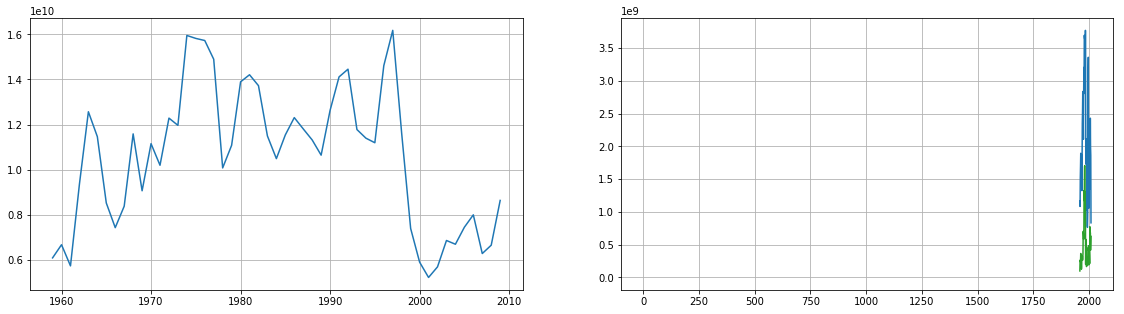

In [30]:
from matplotlib.pyplot import figure
#paises dentro da OTAN
t = np.arange(1959,2010)
EUA_export=inside_export.iloc[0,1:52]
FR_export=inside_export.iloc[1,1:52]
IT_export=inside_export.iloc[2,1:52]
#plotando os graficos
plt.figure(figsize=(30,5))
plt.subplot(131)
plot= plt.plot(t,EUA_export)
plt.grid(True)


plt.subplot(132)
plot= plt.plot(t,FR_export)
plt.grid(True)


plt.plot(133)
plot=plt.plot(t,IT_export)
plt.grid(True)


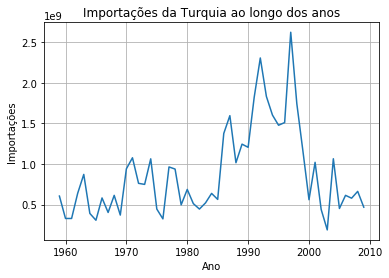

In [31]:
turquia_import=lately_import.iloc[2,1:52]

lately_import
t = np.arange(1959,2010)
plt.plot(t, turquia_import)
plt.title("Importações da Turquia ao longo dos anos")
plt.xlabel("Ano")
plt.ylabel("Importações")
plt.grid(True)
plt.show()